<a href="https://colab.research.google.com/github/Akellesh/Predicting-Term-Deposit-Subscription-by-a-client/blob/main/Predicting_Term_Deposit_Subscription_by_a_client_SVM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Predicting Term Deposit Subscription by a client

Predicting Term Deposit Subscription by a client_SVM

**Abstract:**

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening a deposit account) in which your money will be returned back at a specific maturity time.

**Problem Statement:**

Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics

**Dataset Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on

**Variable Description:**

1. age - Age of the client

2. job - Type of job (categorical: 'admin.','blue-collar', 'entrepreneur',
                    'housemaid', 'management', 'retired','self-employed', 'services','student', 'technician', 'unemployed', 'unknown')

3. marital - Marital status (categorical:
            'divorced','married','single','unknown'; note: 'divorced' means
            divorced or widowed)

4. education - (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.     
               school','illiterate', 'professional.course', 'university.degree','unknown')

5. default - has credit in default? (categorical: 'no','yes','unknown')

6. housing - has a housing loan? (categorical: 'no','yes','unknown')

7. loan - has a personal loan? (categorical: 'no','yes','unknown')

8. contact - contact communication type (categorical: 'cellular','telephone')

9. month - last contact month of year (categorical: 'jan', 'feb', 'mar', ...,
'nov', 'dec')

10. day_of_week - last contact day of the week (categorical:
                  'mon','tue','wed','thu','fri')

11. duration - last contact duration, in seconds

12. campaign - number of contacts performed during this campaign and for
               this client (numeric, includes last contact)

13. pdays - number of days that passed by after the client was last
            contacted from a previous campaign (numeric; 999 means
            client was not previously contacted)

14. previous - number of contacts performed before this campaign and for
               this client

15. poutcome - outcome of the previous marketing campaign (categorical:
               'failure','nonexistent','success')

16. emp.var.rate - employment variation rate - quarterly indicator (numeric)

17. cons.price.idx - consumer price index - monthly indicator

18. cons.conf.idx - consumer confidence index - monthly indicator

19. euribor3m - euribor 3 month rate - daily indicator

20. nr.employed - number of employees - quarterly indicator

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

**Scope:**

● Sentiment analysis in a variety of forms

● Data Pre-processing

● Training data using SVM

● Hyperparameter Tuning

**Learning Outcome:**

The students will get a better understanding of how the variables are linked to each other and should be able to predict whether a client of a bank will subscribe to a term deposit or not such that banks can plan the different campaigns for different customers according to the patterns.

#Content

1. Import & Load Data               
    1.1 Import Packages  
    1.2. Load Data
2. Exploratory Data Analysis & Feature Engineering (EDA & FE)
        2.1 : Fixing Columns and Data
            2.1.1. Fixing Column Names
            2.1.2. Fixing Features Data
        2.2 : Understanding Data Structure - Data Types
            2.2.1. Missing and Null Values Analysis
            2.2.2. Variable Type conversion
            2.2.3. Statistical Summary
        2.3 : Visualize Features and Findings
            2.3.1 Visualize Numerical features
            2.3.2 Visualize Categorical features
        2.4 : Correlation Analysis, Encoding and Drop features
            2.4.1. Label Encoding for Target Variable
            2.4.2 Finding Correlation between Numeric features and heatmap
            2.4.3. Finding Correlation between      
            categorical features - Chi2 Test
            2.4.4. Dropping features
            2.4.5 One-hot Encoding for Categorical features
3. Model building - Support Vector Mechine (SVM)
        3.1 : SVM using linear kernal Model for Test Size 0.20, 0.25, 0.30
        3.2 : SVM using RBF kernal Model for Test Size 0.20, 0.25, 0.30
        3.3 : SVM using Sigmoid kernal Model for Test Size 0.20, 0.25, 0.30
        3.4 : SVM using Polynomial kernel Model for Test Size 0.20, 0.25, 0.30
        3.5 : SVM LinearSVC Model for Test Size 0.20, 0.25, 0.30
        3.6 : Hyperparameter Tuning
            3.6.1. Hyperparameter Tuning for SVM
            3.6.2. Hyperparameter Tuning for LinearSVC
4. Conculsion
        


# 1. Import & Load Data

## 1.1. Import Packages

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from tqdm import tqdm_notebook

In [2]:
# Import label encoder, chi2, model selection
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
# Import Model and scores
from sklearn.exceptions import ConvergenceWarning
import warnings
# Hide ConvergenceWarnings globally
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

## 1.2. Load Data

In [4]:
df = pd.read_csv("bank-additional-full.csv",header=None)

In [5]:
df

,0
0,age;job;marital;education;default;housing;loan...
1,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
2,"57;""services"";""married"";""high.school"";""unknown..."
3,"37;""services"";""married"";""high.school"";""no"";""ye..."
4,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
...,...
41184,"73;""retired"";""married"";""professional.course"";""..."
41185,"46;""blue-collar"";""married"";""professional.cours..."
41186,"56;""retired"";""married"";""university.degree"";""no..."
41187,"44;""technician"";""married"";""professional.course..."


# 2. Exploratory Data Analysis & Feature Engineering (EDA & FE)

## 2.1. Fixing Columns and Data

### 2.1.1. Fixing Column Names

In [6]:
# split column into multiple columns by delimiter
df = df[0].str.split(';', expand=True)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41185,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41187,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [8]:
# Making the 1st row as Column or features
df.columns=df.iloc[0]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41185,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41187,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [9]:
# Keeping One duplicate Variable for handling changes in later stages
df1 = df

In [10]:
# Row 0 is dropped
df1 = df1.drop([0])
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
5,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41185,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41187,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


### 2.1.2. Fixing Features Data

In [11]:
# Target variable unique values
df1['y'].unique()

array(['"no"', '"yes"'], dtype=object)

In [12]:
df1['job'].unique()

array(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],
      dtype=object)

In [13]:
df1['education'].unique()

array(['"basic.4y"', '"high.school"', '"basic.6y"', '"basic.9y"',
       '"professional.course"', '"unknown"', '"university.degree"',
       '"illiterate"'], dtype=object)

In [14]:
df1['default'].unique()
df1['marital'].unique()
df1['housing'].unique()
df1['loan'].unique()
df1['contact'].unique()
df1['month'].unique()
df1['day_of_week'].unique()
df1['poutcome'].unique()

array(['"nonexistent"', '"failure"', '"success"'], dtype=object)

Extra double quotes with output "yes" and "no" removed by pandas replace method

In [15]:
# For Target variable
df1['y'].replace(['"no"', '"yes"'],["no", "yes"], inplace=True)

<ipython-input-15-696441259>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['y'].replace(['"no"', '"yes"'],["no", "yes"], inplace=True)


Remove extra double quotes with for other features also for better analysis

In [16]:
df1['job'].replace(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],['housemaid', 'services', 'admin', 'blue-collar',
       'technician', 'retired', 'management', 'unemployed',
       'self-employed', 'unknown', 'entrepreneur', 'student'], inplace=True)

df1['marital'].replace(['"married"', '"single"', '"divorced"', '"unknown"'],['married', 'single', 'divorced', 'unknown'], inplace=True)

<ipython-input-16-4211869802>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['job'].replace(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
<ipython-input-16-4211869802>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [17]:
df1['education'].replace(['"basic.4y"', '"high.school"', '"basic.6y"', '"basic.9y"',
       '"professional.course"', '"unknown"', '"university.degree"',
       '"illiterate"'],['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], inplace=True)

<ipython-input-17-865821726>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['education'].replace(['"basic.4y"', '"high.school"', '"basic.6y"', '"basic.9y"',


In [18]:
df1['default'].replace(['"no"', '"unknown"', '"yes"'],['no', 'unknown', 'yes'], inplace=True)

df1['housing'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)

<ipython-input-18-1658617033>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['default'].replace(['"no"', '"unknown"', '"yes"'],['no', 'unknown', 'yes'], inplace=True)
<ipython-input-18-1658617033>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [19]:
df1['loan'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)

df1['contact'].replace(['"telephone"', '"cellular"'],['telephone', 'cellular'], inplace=True)

<ipython-input-19-376439753>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['loan'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)
<ipython-input-19-376439753>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [20]:
df1['month'].replace(['"may"', '"jun"', '"jul"', '"aug"', '"oct"', '"nov"', '"dec"',
       '"mar"', '"apr"', '"sep"'],['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec',
       'mar', 'apr', 'sep'], inplace=True)

<ipython-input-20-1036693777>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['month'].replace(['"may"', '"jun"', '"jul"', '"aug"', '"oct"', '"nov"', '"dec"',


In [21]:
df1['day_of_week'].replace(['"mon"', '"tue"', '"wed"', '"thu"', '"fri"'],['mon', 'tue', 'wed', 'thu', 'fri'], inplace=True)

df1['poutcome'].replace(['"nonexistent"', '"failure"', '"success"'],['nonexistent', 'failure', 'success'], inplace=True)

<ipython-input-21-1568220760>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['day_of_week'].replace(['"mon"', '"tue"', '"wed"', '"thu"', '"fri"'],['mon', 'tue', 'wed', 'thu', 'fri'], inplace=True)
<ipython-input-21-1568220760>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [22]:
df1['default'].unique()
df1['marital'].unique()
df1['housing'].unique()
df1['loan'].unique()
df1['contact'].unique()
df1['month'].unique()
df1['day_of_week'].unique()
df1['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

## 2.2. Understanding Data Structure - Data types

### 2.2.1. Missing and Null Values Analysis

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [24]:
df.isnull().sum()

,0
0,
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0


In [25]:
# Finding the Null values in the dataset
df.isna().sum()

,0
0,
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0


### 2.2.2. Variable Type Conversion

In [26]:
df1.dtypes

,0
0,
age,object
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object


Object type features which are numerical in value, converted in to numeric type with the help of Pandas to_numberic function

In [27]:
df1["age"] = pd.to_numeric(df1.age)
df1["campaign"] = pd.to_numeric(df1["campaign"])
df1["pdays"] = pd.to_numeric(df1.pdays)
df1["previous"] = pd.to_numeric(df1.previous)
df1["emp.var.rate"] = pd.to_numeric(df1["emp.var.rate"])
df1["cons.price.idx"] = pd.to_numeric(df1["cons.price.idx"])
df1["cons.conf.idx"] = pd.to_numeric(df1["cons.conf.idx"])
df1["euribor3m"] = pd.to_numeric(df1["euribor3m"])
df1["nr.employed"] = pd.to_numeric(df1["nr.employed"])

In [28]:
df1.dtypes

,0
0,
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object


Un recognized dtypes by pandas are treated in this step, object data types converted into numeric data types

### 2.2.3. Statistical Summary

In [29]:
df1.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2.3. Visualize Features & Findings

### 2.3.1. Visualize Numerical Features

In [30]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [31]:
df1["age"].describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


Observation towards Age and Term Deposit taken or not

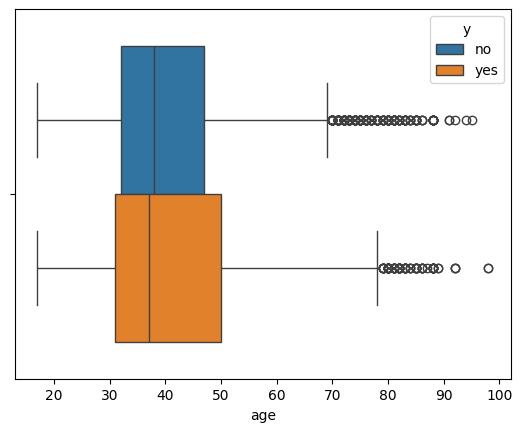

In [32]:
sns.boxplot(data=df1, x="age", hue="y");

In this box plot we can observe that most of the dataset values age lies in the range of early 20's to 70 and 25th percentile around 32 and 75th percentile around 48. Median lies at 38 aproximately.

above age 70, we observe some outliers, so we need to visualize further more to come to some conclusion on the same.

In [33]:
df1[df1['age']>70].count()

,0
0,
age,422
job,422
marital,422
education,422
default,422
housing,422
loan,422
contact,422
month,422


In [34]:
df1_ = df1['age'].value_counts()
df1_.tail(20)

,count
age,
78,27
67,26
75,24
88,22
77,20
81,20
83,17
82,17
85,15


In [35]:
df1_ = df1.groupby('age')['y'].count()
df1_

,y
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [36]:
df1[df1['age']>70]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27758,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27781,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27801,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40987,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40997,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41005,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


We need to filter whar is the percentage of people above age 70 taken term deposit.

In [37]:
df1[(df1['age']<70) & (df1['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
76,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
84,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
89,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
130,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
140,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
df1[(df1['age']>70) & (df1['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27811,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27812,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27814,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,7,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40757,77,retired,married,basic.4y,no,yes,no,cellular,sep,thu,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40934,71,retired,married,professional.course,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
40997,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41005,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes


By comparing above two calculations we can see considerable percentage of people taken term deposit above age 70, so we can't just drop the values as outliers, because which is very important for marketing campaign analysis

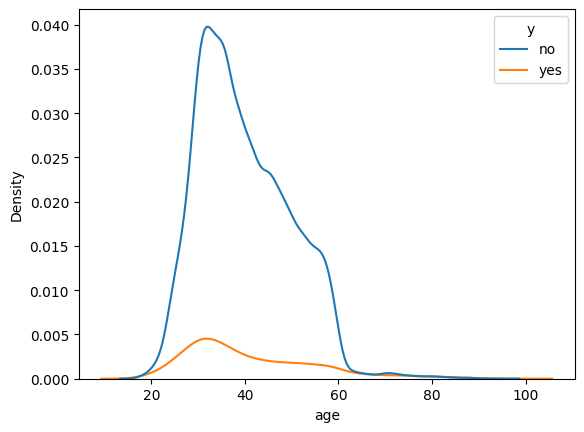

In [39]:
sns.kdeplot(data=df1, x="age", hue="y");

According to the total number of people contacted through marketing campaign, people taken term deposit is much lower in percentage

Creating subset, analysing the same with age and result, now the box plot clearly shows increased range, and as well as 25th and 75th percentile.

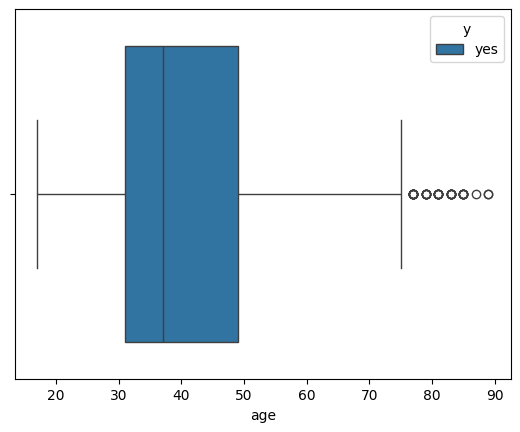

In [40]:
df1_sub = df1[(df1["age"])&(df1["y"]=='yes')]
sns.boxplot(data=df1_sub, x="age", hue="y");

Even Age above 80 also success rate is there

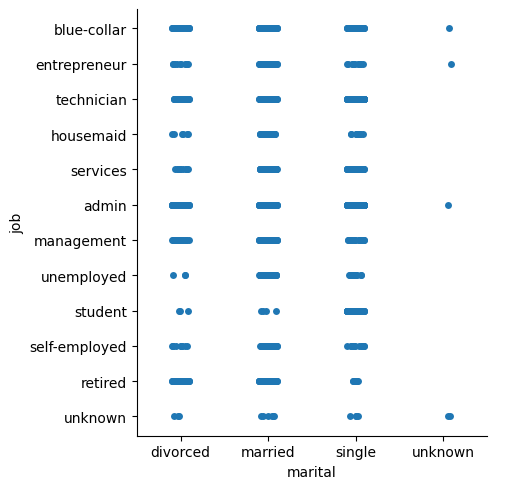

In [41]:
sns.catplot(data=df1_sub, x="marital", y="job");

In [42]:
df1[(df1['age']>80) & (df1['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27811,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27812,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27814,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,7,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27817,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27818,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27819,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
28313,82,retired,married,unknown,no,no,no,cellular,apr,wed,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,yes
30007,85,retired,married,basic.4y,unknown,yes,no,cellular,apr,tue,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes


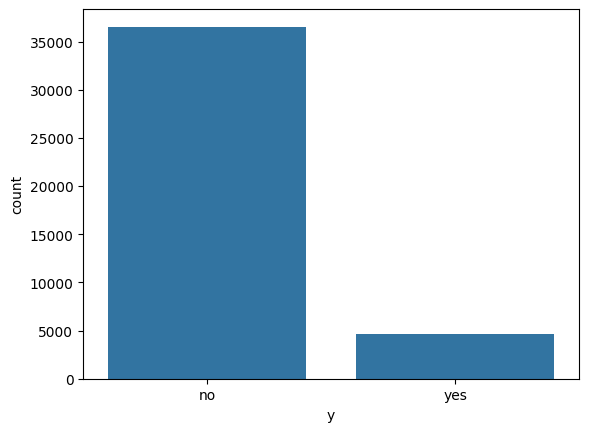

In [43]:
sns.countplot(x="y", data=df1);

## 2.3.2. Visualize Categorical Features

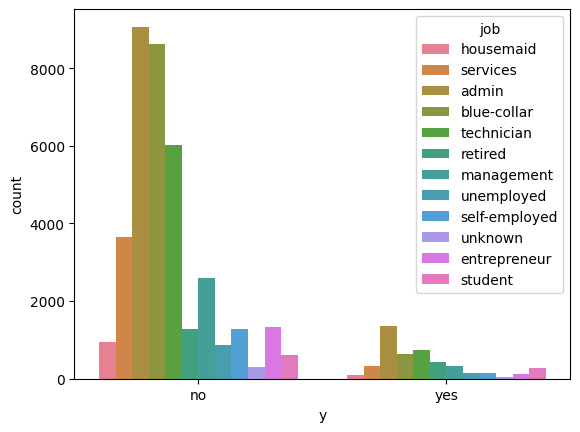

In [44]:
sns.countplot(x="y", hue="job", data=df1);

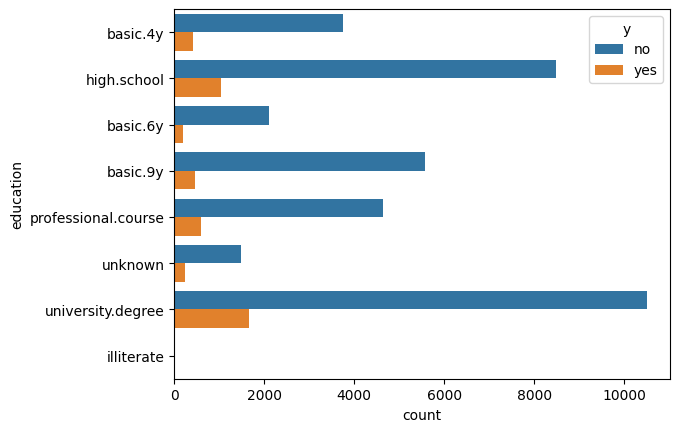

In [45]:
sns.countplot(y="education", hue="y", data=df1);

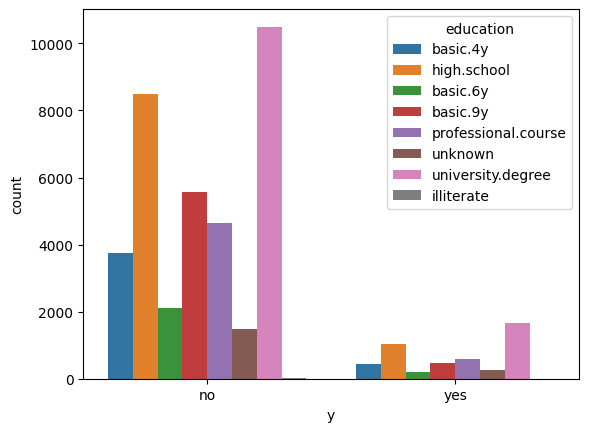

In [46]:
sns.countplot(x="y", hue="education", data=df1);

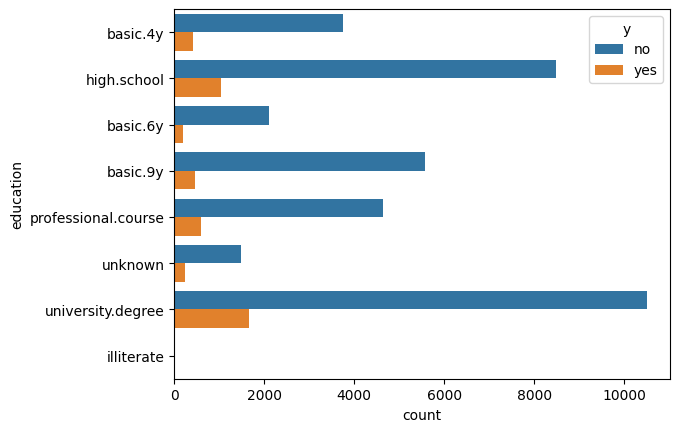

In [47]:
sns.countplot(y="education", hue="y", data=df1);

In [48]:
df1_loan_subset = df1[(df1['default']=='no') & (df1['housing'] == 'yes')& (df1['loan'] == 'yes')]
df1_loan_subset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
47,57,admin,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
88,39,admin,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
125,32,admin,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
128,31,technician,divorced,professional.course,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41084,24,technician,single,university.degree,no,yes,yes,cellular,nov,tue,...,3,6,3,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41086,51,admin,divorced,high.school,no,yes,yes,cellular,nov,tue,...,2,6,4,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41099,29,student,single,high.school,no,yes,yes,cellular,nov,thu,...,1,3,3,success,-1.1,94.767,-50.8,1.050,4963.6,yes
41128,61,admin,married,high.school,no,yes,yes,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.044,4963.6,yes


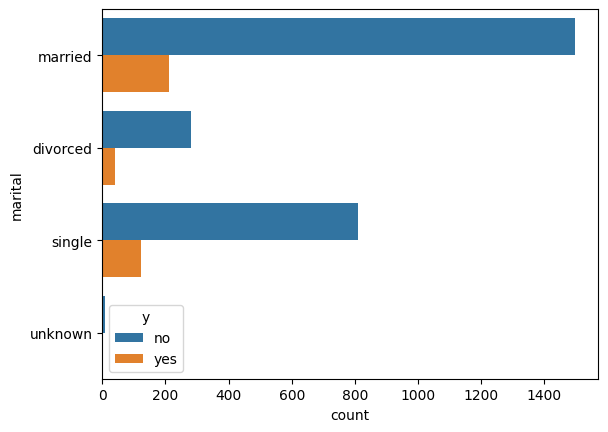

In [49]:
sns.countplot(y="marital", hue="y", data=df1_loan_subset);

In [50]:
df1[(df1['default']=='no') & (df1['housing'] == 'no')& (df1['loan'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,35,technician,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
44,57,admin,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
48,40,blue-collar,married,basic.9y,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41070,51,services,married,high.school,no,no,yes,cellular,nov,mon,...,2,3,4,success,-1.1,94.767,-50.8,1.050,4963.6,no
41081,27,student,single,high.school,no,no,yes,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.049,4963.6,no
41091,31,admin,single,university.degree,no,no,yes,cellular,nov,wed,...,2,3,6,success,-1.1,94.767,-50.8,1.048,4963.6,no
41112,46,admin,single,university.degree,no,no,yes,cellular,nov,tue,...,1,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,no


## 2.4. Correlation Analysis, Encoding and Drop Features

### 2.4.1. Label Encoding for Target Variable



In [51]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df1['y']= label_encoder.fit_transform(df1['y'])

df1['y'].unique()

array([0, 1])

In [52]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### 2.4.2. Finding Correlation between Numeric Features and Heatmap

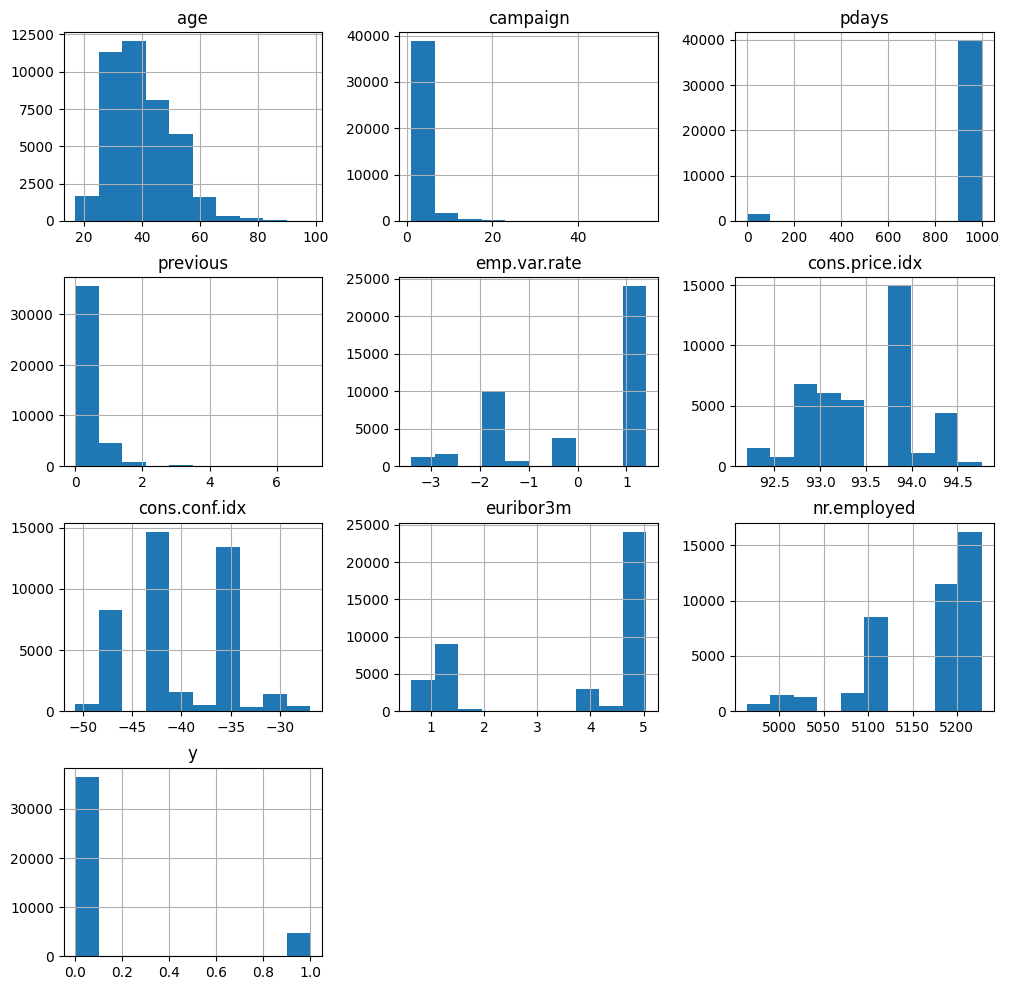

In [53]:
df1.hist(figsize=(12,12));

Finding correlation between target and other numeric variable after label encoding

In [54]:
df1_nu_corr = df1[["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]].corr()
df1_nu_corr

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,,,,,,,,,,
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


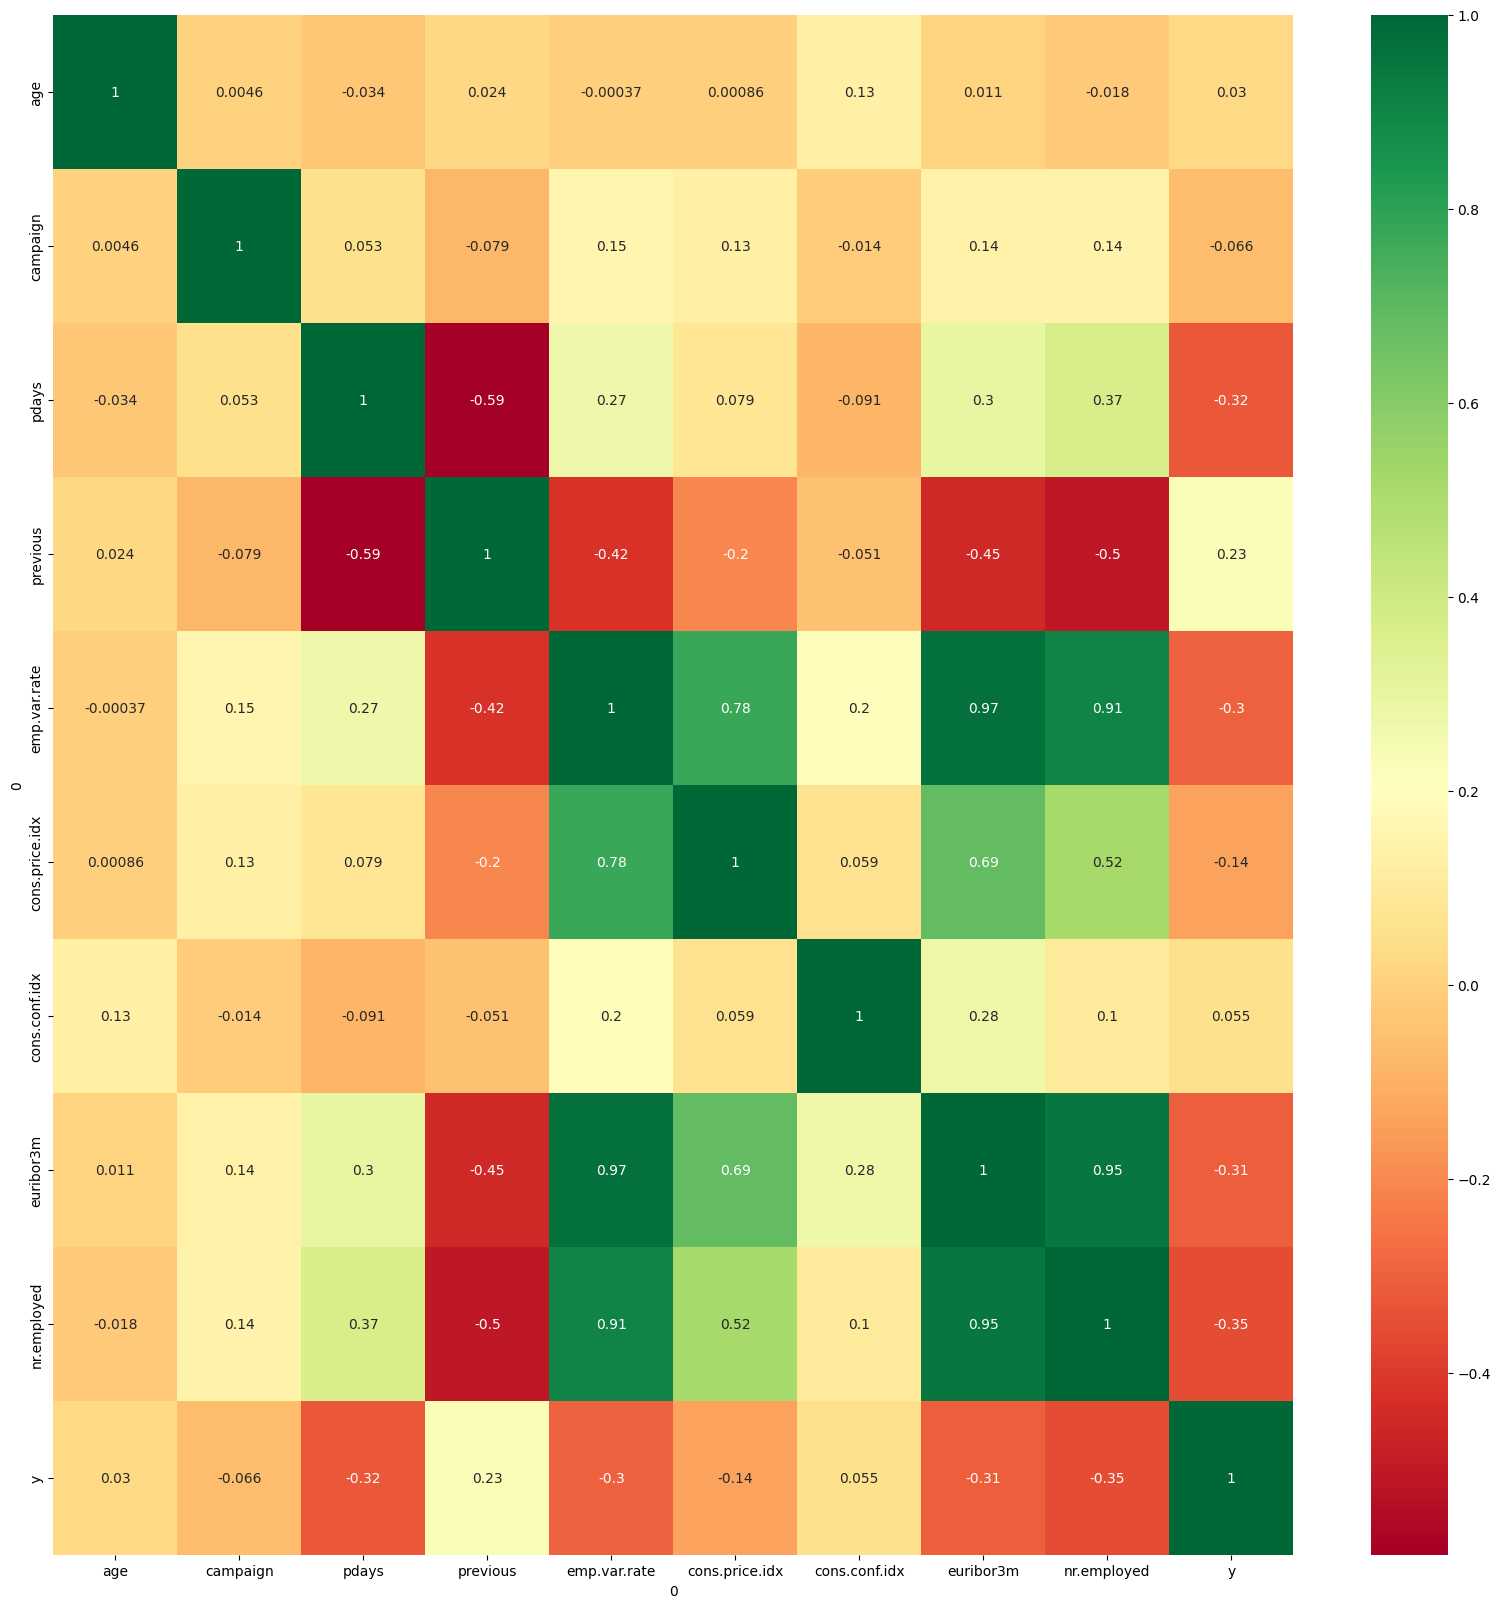

In [55]:
fig= plt.figure(figsize=(20,20));
sns.heatmap(df1_nu_corr,annot=True,cmap="RdYlGn");
plt.show();
# RdYlGn
# BuGn_r

By seeing this heatmap, age is not correlated with the outcome 'y', that is less than 5%, so we can drop 'age'

Education column also have very less effect on output target variable

### 2.4.3. Finding Correlation between Categorical Features - Chi2 Test

In [56]:
def is_correlated(x,y):
    ct=pd.crosstab(index=df1[x], columns= df1[y])
    chi_sq_result = chi2_contingency(ct,)
    p,x = chi_sq_result[1], "correlated" if chi_sq_result[1] < 0.05 else "not-correlated"
    return p,x

In [57]:
print("The p-value and correlation for job:", is_correlated('job','y'))
print("The p-value and correlation for marital:", is_correlated('marital','y'))
print("The p-value and correlation for education:", is_correlated('education','y'))
print("The p-value and correlation for default:", is_correlated('default','y'))
print("The p-value and correlation for housing:", is_correlated('housing','y'))
print("The p-value and correlation for loan:", is_correlated('loan','y'))
print("The p-value and correlation for contact:", is_correlated('contact','y'))
print("The p-value and correlation for day_of_week:", is_correlated('day_of_week','y'))
print("The p-value and correlation for poutcome:", is_correlated('poutcome','y'))

The p-value and correlation for job: (np.float64(4.189763287563623e-199), 'correlated')
The p-value and correlation for marital: (np.float64(2.068014648442211e-26), 'correlated')
The p-value and correlation for education: (np.float64(3.3051890144025054e-38), 'correlated')
The p-value and correlation for default: (np.float64(5.1619579513916376e-89), 'correlated')
The p-value and correlation for housing: (np.float64(0.05829447669453452), 'not-correlated')
The p-value and correlation for loan: (np.float64(0.5786752870441754), 'not-correlated')
The p-value and correlation for contact: (np.float64(1.5259856523129964e-189), 'correlated')
The p-value and correlation for day_of_week: (np.float64(2.9584820052785324e-05), 'correlated')
The p-value and correlation for poutcome: (np.float64(0.0), 'correlated')


To create model and evaluate, we are creating categorical features into numeric one, by using One-hot Encoding for categorical data

### 2.4.4. Dropping Features

Education column also have very less effect on output target variable

In [58]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [59]:
df1[(df1['default']=='"yes"') & (df1['housing'] == '"no"')& (df1['loan'] == '"no"')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


House and loan is not correlated with the outcome 'y', so we can drop those 2 features

In [60]:
df1[(df1['default']=='yes') & (df1['housing'] == 'yes')& (df1['loan'] == 'no')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21582,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0


In [61]:
df1[(df1['default']=='yes') & (df1['housing'] == 'yes')& (df1['loan'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


Target variable, not depends on these below mentioned columns, so we are droping the same for better calculation,
1.age, 2. housing, 3. loan

In [62]:
df1.drop(["age", "housing", "loan"], axis=1, inplace=True)

In [63]:
df1

,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,housemaid,married,basic.4y,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,services,married,high.school,unknown,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,services,married,high.school,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,admin,married,basic.6y,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,services,married,high.school,no,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,retired,married,professional.course,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,retired,married,university.degree,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41187,technician,married,professional.course,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### 2.4.5. One-hot Encoding for Categorical Features

In [64]:
df2 =df1

In [65]:
job_col_du = pd.get_dummies(df2['job'], prefix='job_du')
edu_col_du = pd.get_dummies(df2['education'], prefix='edu_du')
marital_col_du = pd.get_dummies(df2['marital'], prefix='marital_du')
edu_col_du = pd.get_dummies(df2['default'], prefix='default_du')
contact_col_du = pd.get_dummies(df2['contact'], prefix='contact_du')
month_col_du = pd.get_dummies(df2['month'], prefix='month_du')
day_col_du = pd.get_dummies(df2['day_of_week'], prefix='day_du')
pout_col_du = pd.get_dummies(df2['poutcome'], prefix='pout_du')

In [66]:
df2 = pd.concat([df2, job_col_du, edu_col_du, marital_col_du, edu_col_du, contact_col_du , month_col_du, day_col_du, pout_col_du], axis=1)

In [67]:
df2.drop(["job", "education", "marital", "default", "contact", "month", "day_of_week", "poutcome"], axis=1, inplace=True)

In [68]:
df2

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_du_oct,month_du_sep,day_du_fri,day_du_mon,day_du_thu,day_du_tue,day_du_wed,pout_du_failure,pout_du_nonexistent,pout_du_success
1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
2,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
3,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
4,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
5,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,False,False,True,False,False,False,False,False,True,False
41185,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,False,False,True,False,False,False,False,False,True,False
41186,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,False,False,True,False,False,False,False,False,True,False
41187,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,False,False,True,False,False,False,False,False,True,False


# 3. Model Buiding - Support Vector Mechine (SVM)

**Split Features and Target variables**

In [69]:
x= df2.drop('y',axis=1)
y= df2['y']

## 3.1 SVM using Linear Kernal Model for Test Size 0.20, 0.25, 0.30

**Training model**

In [71]:
test_size_value1 = [0.2, 0.25, 0.3]
train_accuracy1 = []
test_accuracy1 = []
# for i in tqdm_notebook(test_size_value1, total=len(test_size_value1), unit='test_size_value'):
for i in test_size_value1:
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=i, random_state=1)
    model1=SVC(kernel ='linear')

    # training set in x, y axis
    result1=model1.fit(x_train1,y_train1)
    train_preds1 = model1.predict(x_train1)
    test_preds1 = model1.predict(x_test1)  # y_pred1=result1.predict(x_test1)

    train_accuracy1.append(accuracy_score(y_train1, train_preds1)) #alternate metiod Accuracy = model1.score(x_train1, y_train1
    test_accuracy1.append(accuracy_score(y_test1, test_preds1))

**Result**

In [72]:
print("Train Accuracy with test size [0.2, 0.25, 0.3]:", train_accuracy1)
print("Test Accuracy with test size [0.2, 0.25, 0.3]:", test_accuracy1)
print(classification_report(test_preds1,y_test1))

Train Accuracy with test size [0.2, 0.25, 0.3]: [0.9088012139605463, 0.906930821274805, 0.907564774027956]
Test Accuracy with test size [0.2, 0.25, 0.3]: [0.9060451565914057, 0.9053122268621929, 0.9083110787407946]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11477
           1       0.41      0.66      0.51       880

    accuracy                           0.91     12357
   macro avg       0.69      0.79      0.73     12357
weighted avg       0.93      0.91      0.92     12357



## 3.2 SVM using RBF kernal Model for Test Size 0.20, 0.25, 0.30

**Training model**

In [73]:
test_size_value2 = [0.2, 0.25, 0.3]
train_accuracy2 = []
test_accuracy2 = []
# for i in tqdm_notebook(test_size_value2, total=len(test_size_value2), unit='test_size_value'):
for i in test_size_value2:
    x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=i, random_state=1)
    model2=SVC(kernel ='rbf', random_state = 1)

    # training set in x, y axis
    result2=model2.fit(x_train2,y_train2)

    train_preds2 = model2.predict(x_train2)
    test_preds2 = model2.predict(x_test2)
    # test_pred2=result2.predict(x_test2)

    train_accuracy2.append(accuracy_score(y_train2, train_preds2)) #accuracy_score(y_train1, train_preds)
    test_accuracy2.append(accuracy_score(y_test2, test_preds2)) # accuracy_score(y_test1, test_preds)

**Result**

In [74]:
print("Train Accuracy with test size [0.2, 0.25, 0.3]:", train_accuracy2)
print("Test Accuracy with test size [0.2, 0.25, 0.3]:", test_accuracy2)
print(classification_report(test_preds2,y_test2))

Train Accuracy with test size [0.2, 0.25, 0.3]: [0.8979666160849772, 0.8978666925641773, 0.8988588671915646]
Test Accuracy with test size [0.2, 0.25, 0.3]: [0.8974265598446225, 0.8977372050111683, 0.8952820263818079]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11880
           1       0.21      0.62      0.32       477

    accuracy                           0.90     12357
   macro avg       0.60      0.77      0.63     12357
weighted avg       0.95      0.90      0.92     12357



## 3.3 SVM using sigmoid kernal Model for Test Size 0.20, 0.25, 0.30

**Training model**

In [75]:
test_size_value3 = [0.2, 0.25, 0.3]
train_accuracy3 = []
test_accuracy3 = []
# for i in tqdm_notebook(test_size_value3, total=len(test_size_value3), unit='test_size_value'): #
for i in test_size_value3:
    x_train3,x_test3,y_train3,y_test3 = train_test_split(x,y,test_size=i, random_state=1)
    model3=SVC(kernel ='sigmoid', random_state = 1)

    # training set in x, y axis
    result3=model3.fit(x_train3,y_train3)

    train_preds3 = model3.predict(x_train3)
    test_preds3 = model3.predict(x_test3)
    # test_pred2=result3.predict(x_test3)

    train_accuracy3.append(accuracy_score(y_train3, train_preds3)) #accuracy_score(y_train1, train_preds)
    test_accuracy3.append(accuracy_score(y_test3, test_preds3)) # accuracy_score(y_test1, test_preds)

**Result**

In [76]:
print("Train Accuracy with test size [0.2, 0.25, 0.3]:", train_accuracy3)
print("Test Accuracy with test size [0.2, 0.25, 0.3]:", test_accuracy3)
print(classification_report(test_preds3,y_test3))

Train Accuracy with test size [0.2, 0.25, 0.3]: [0.8977845220030349, 0.8976077174581594, 0.8986507578647983]
Test Accuracy with test size [0.2, 0.25, 0.3]: [0.8976693372177713, 0.8978343206759251, 0.895039249008659]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11889
           1       0.21      0.62      0.31       468

    accuracy                           0.90     12357
   macro avg       0.60      0.76      0.63     12357
weighted avg       0.95      0.90      0.92     12357



## 3.4. SVM using Polynomial kernal Model for Test Size 0.20, 0.25, 0.30

**Training Model**

In [77]:
test_size_value4 = [0.2, 0.25, 0.3]
train_accuracy4 = []
test_accuracy4 = []
# for i in tqdm_notebook(test_size_value4, total=len(test_size_value4), unit='test_size_value'):
for i in test_size_value4:
    x_train4,x_test4,y_train4,y_test4 = train_test_split(x,y,test_size=i, random_state=1)
    model4=SVC(kernel ='poly', degree = 2, random_state = 1)

    # training set in x, y axis
    result4=model4.fit(x_train4,y_train4)

    train_preds4 = model4.predict(x_train4)
    test_preds4 = model4.predict(x_test4)
    # test_pred4=result4.predict(x_test4)

    train_accuracy4.append(accuracy_score(y_train4, train_preds4)) #accuracy_score(y_train1, train_preds)
    test_accuracy4.append(accuracy_score(y_test4, test_preds4)) # accuracy_score(y_test1, test_preds)

**Result**

In [78]:
print("Train Accuracy with test size [0.2, 0.25, 0.3]:", train_accuracy4)
print("Test Accuracy with test size [0.2, 0.25, 0.3]:", test_accuracy4)
print(classification_report(test_preds4,y_test4))

Train Accuracy with test size [0.2, 0.25, 0.3]: [0.8977845220030349, 0.8976400893464116, 0.8986854427525927]
Test Accuracy with test size [0.2, 0.25, 0.3]: [0.8976693372177713, 0.8978343206759251, 0.8951201747997086]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11888
           1       0.21      0.62      0.31       469

    accuracy                           0.90     12357
   macro avg       0.60      0.77      0.63     12357
weighted avg       0.95      0.90      0.92     12357



## 3.5 SVM LinearSVC Model for Test Size 0.20, 0.25, 0.30

**Training model**

In [79]:
test_size_value5 = [0.2, 0.25, 0.3]
train_accuracy5 = []
test_accuracy5 = []
# for i in tqdm_notebook(test_size_value5, total=len(test_size_value5), unit='test_size_value'): #
for i in test_size_value5:
    x_train5,x_test5,y_train5,y_test5 = train_test_split(x,y,test_size=i, random_state=1)
    model5=LinearSVC(max_iter=10000, random_state=1)

    # training set in x, y axis
    result5=model5.fit(x_train5,y_train5)

    train_preds5 = model5.predict(x_train5)
    test_preds5 = model5.predict(x_test5)
    # test_pred5=result5.predict(x_test5)

    train_accuracy5.append(accuracy_score(y_train5, train_preds5)) #accuracy_score(y_train1, train_preds)
    test_accuracy5.append(accuracy_score(y_test5, test_preds5)) # accuracy_score(y_test1, test_preds)

**Result**

In [80]:
print("Train Accuracy with test size [0.2, 0.25, 0.3]:", train_accuracy5)
print("Test Accuracy with test size [0.2, 0.25, 0.3]:", test_accuracy5)
print(classification_report(test_preds5,y_test5))

Train Accuracy with test size [0.2, 0.25, 0.3]: [0.908133535660091, 0.9080638373636334, 0.9077035135791336]
Test Accuracy with test size [0.2, 0.25, 0.3]: [0.9058023792182569, 0.9079343498106245, 0.9049931213077608]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11660
           1       0.33      0.67      0.44       697

    accuracy                           0.90     12357
   macro avg       0.66      0.80      0.70     12357
weighted avg       0.94      0.90      0.92     12357



## 3.6. Hyperparameter Tuning

### 3.6.1. Hyperparameter Tuning for SVM (All kernels)

**Training model**

In [81]:
# Define the hyperparameter grid
x_train_cv,x_test_cv,y_train_cv,y_test_cv = train_test_split(x, y, test_size=0.25, random_state=1)
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C': [0.1, 1, 10, 100]}
svm_cv = SVC()
svm_cv = GridSearchCV(svm_cv, parameters, cv=5, scoring='accuracy')
svm_cv.fit(x_train_cv, y_train_cv)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='accuracy')

**Result**

In [82]:
Train_accuracy = svm_cv.score(x_train_cv, y_train_cv)
Test_accuracy = svm_cv.score(x_test_cv, y_test_cv)
print("Train Accuracy:", Train_accuracy)
print("Test Accuracy:", Test_accuracy)
print("Tuned hyperparameters :(best parameters)", svm_cv.best_params_)
print("Best Accuracy :",svm_cv.best_score_)

Train Accuracy: 0.906930821274805
Test Accuracy: 0.9053122268621929
Tuned hyperparameters :(best parameters) {'C': 1, 'kernel': 'linear'}
Best Accuracy : 0.9084199445159623


### 3.6.2. Hyperparameter Tuning for LinearSVC

**Training model**

In [83]:
train_accuracy7 = []
test_accuracy7 = []

x_train7,x_test7,y_train7,y_test7 = train_test_split(x,y,test_size=0.25, random_state=1)

# for i in tqdm_notebook([10000, 20000, 30000], total=len([10000, 20000, 30000]), unit='Iterations'):


pipeline = Pipeline([('scaler', StandardScaler()),('svc', LinearSVC(max_iter=10000))])

param_grid = {'svc__C': [0.01, 0.1, 1, 10],'svc__penalty': ['l2'],'svc__loss': ['squared_hinge'],
'svc__dual': [True, False]}

# training set in x, y axis
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train7, y_train7)

train_preds7 = grid.predict(x_train7)
test_preds7 = grid.predict(x_test7)    # other method test_pred5=result5.predict(x_test5)

train_accuracy7.append(accuracy_score(y_train7, train_preds7))
test_accuracy7.append(accuracy_score(y_test7, test_preds7))

**Result**

In [84]:
print("Train Accuracy with iterations [10000, 20000, 30000]:", train_accuracy7)
print("Test Accuracy with iterations [10000, 20000, 30000]:", test_accuracy7)
print(classification_report(test_preds7,y_test7))
print("Tuned hyperparameters :(best parameters)", grid.best_params_)
print("Best Accuracy :",grid.best_score_)

Train Accuracy with iterations [10000, 20000, 30000]: [0.9092292253407142]
Test Accuracy with iterations [10000, 20000, 30000]: [0.9076430028163542]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      9653
           1       0.37      0.67      0.47       644

    accuracy                           0.91     10297
   macro avg       0.67      0.79      0.71     10297
weighted avg       0.94      0.91      0.92     10297

Tuned hyperparameters :(best parameters) {'svc__C': 10, 'svc__dual': True, 'svc__loss': 'squared_hinge', 'svc__penalty': 'l2'}
Best Accuracy : 0.9090673351310382


# 4. Conclusion

LinearSVC brings the best results for this dataset, And LinearSVC is the fastest in running the model.

This dataset have more categorical values to address, and the model is design with SVM. it is best suitable for categorical features and given high accuracy. From the above analysis, we can see 90% accuracy from our model,  Default credit, housing loan, contact type is not having bigger impact in the output in this dataset but this is also a factor which affect the customer to not to take term loan, and we take the effort of the campaign department, which have some considerable amount of impact in the result, last call duration indicates that which ever call spoke lesser time in seconds customer do not take term deposit, and long gap provided between the followup or call, there is bigger impact in the closing of the product, there is high chance of customer take term deposit with some other bank or from different team. Followup with customer is very important for the campaign to increase the term loan taking output. Concentrating more on the not converted people from the age group between 30 to 60 and salary profession gives improve more outcome for the term deposit. There is one more value in many of features not addressed is "unknown" values (job, marital, education, default, housing, loan), which can be handled by different methods like interpolate or replace from pandas. That can be the future scope of the project which may increase the accuracy further more.
